In [1]:
import pandas as pd

# 데이터 준비
mg_df = pd.read_csv('final_merged_df_correction.csv', index_col=0)
mg_df.head(), mg_df.shape, mg_df.columns.unique()

(          시점  아파트매매가격지수    인구밀도  사교육참여율   고용률  여성초혼연령  인터넷이용률  합계출산율   근로시간
 지역별                                                                        
 강원   2015.01       82.1    90.2    61.6  51.7   29.62    74.1  1.311  173.1
 경기   2015.01       89.6  1227.9    71.7  60.8   30.04    86.3  1.272  175.2
 경남   2015.01      105.3   316.4    65.7  58.3   29.76    86.4  1.437  172.2
 경북   2015.01      109.4   140.8    64.2  59.2   29.55    86.6  1.464  170.6
 광주   2015.01       87.7  2998.5    66.0  57.6   30.09    90.2  1.207  171.5,
 (1728, 9),
 Index(['시점', '아파트매매가격지수', '인구밀도', '사교육참여율', '고용률', '여성초혼연령', '인터넷이용률', '합계출산율',
        '근로시간'],
       dtype='object'))

In [2]:
# target은 제외하고 클러스터링을 진행합니다.
X = mg_df.drop('합계출산율', axis=1)
y = mg_df['합계출산율']
X.head()

,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,근로시간
지역별,,,,,,,,
강원,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,173.1
경기,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,175.2
경남,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,172.2
경북,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,170.6
광주,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,171.5


In [3]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# K-Means 클러스터링
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)

# 데이터에 K-Means 적용
kmeans.fit(X)

# 각 데이터 점의 군집 라벨
y_kmeans = kmeans.predict(X)

# 클러스터 중심
centers = kmeans.cluster_centers_

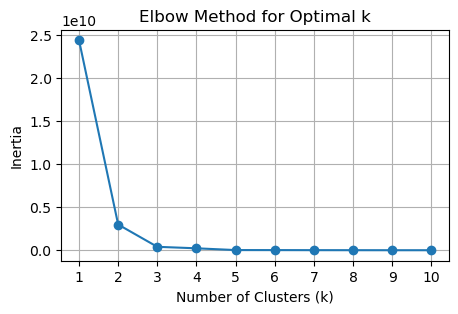

In [5]:
import matplotlib.pyplot as plt
# 데이터 X에 대해 K-Means 클러스터링을 수행하고 각 클러스터 수에 대한 변동성 계산
inertia = []
k_range = range(1, 11)  # 클러스터 수 범위 설정

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)  # X는 클러스터링할 데이터
    inertia.append(kmeans.inertia_)  # 각 k에 대한 inertia 추가

# Elbow Method 시각화
plt.figure(figsize=(5, 3))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [6]:
X_unique = X[~X.index.duplicated(keep='first')]
kmeans_df = pd.concat([X_unique.reset_index(drop=True), pd.Series(y_kmeans, name='cluster')], axis=1)
kmeans_df.head()

,시점,아파트매매가격지수,인구밀도,사교육참여율,고용률,여성초혼연령,인터넷이용률,근로시간,cluster
0,2015.01,82.1,90.2,61.6,51.7,29.62,74.1,173.1,0
1,2015.01,89.6,1227.9,71.7,60.8,30.04,86.3,175.2,0
2,2015.01,105.3,316.4,65.7,58.3,29.76,86.4,172.2,0
3,2015.01,109.4,140.8,64.2,59.2,29.55,86.6,170.6,0
4,2015.01,87.7,2998.5,66.0,57.6,30.09,90.2,171.5,2


In [7]:
from sklearn.decomposition import PCA

# PCA 객체 생성 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, pd.Series(y_kmeans, name='cluster')], axis=1)
pca_df.head()

,PC1,PC2,cluster
0,-2117.912125,-24.660753,0
1,-980.193070,-16.638933,0
2,-1891.669099,-0.591783,0
3,-2067.263308,3.661322,0
4,790.397027,-21.858536,2


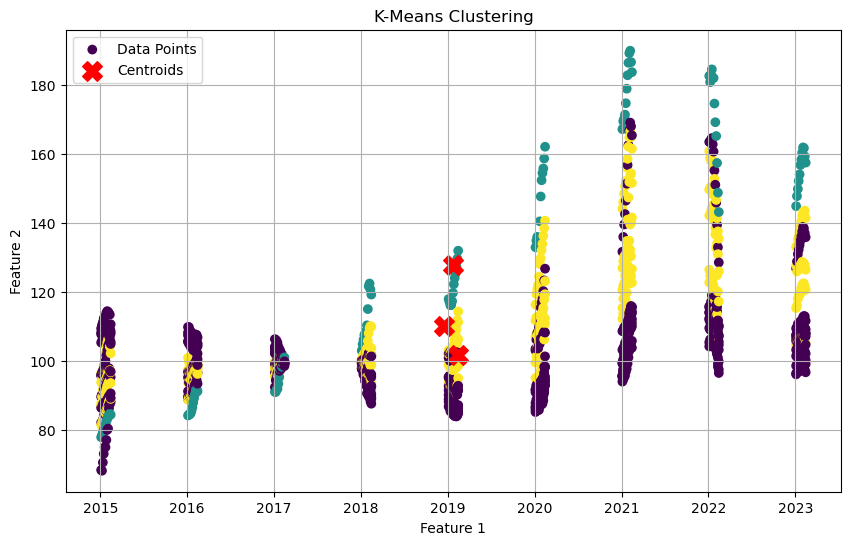

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()